## Compare data to predictions

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import joblib

import sys
sys.path.append("..")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

from ml_editor.data_processing import (
    format_raw_df,
    get_split_by_author,
    add_text_features_to_df,
    get_vectorized_series,
    get_feature_vector_and_label
)

from ml_editor.model_evaluation import get_confusion_matrix_plot, get_roc_plot, get_calibration_plot

data_path=Path("../data/writers.csv")
df=pd.read_csv(data_path)
df=format_raw_df(df.copy())

In [2]:
df=add_text_features_to_df(df.loc[df['is_question']].copy())
train_df, test_df=get_split_by_author(df, test_size=0.2, random_state=42)


In [3]:
model_path=Path("../models/model_1.pkl")
clf=joblib.load(model_path)
vectorizer_path=Path("../models/vectorizer_1.pkl")
vectorizer=joblib.load(vectorizer_path)

In [5]:
train_df["vectors"]=get_vectorized_series(train_df["full_text"].copy(), vectorizer)
test_df["vectors"]=get_vectorized_series(test_df["full_text"].copy(), vectorizer)

features=[
    "action_verb_full",
    "question_mark_full",
    "text_len",
    "language_question"
]

X_train, y_train=get_feature_vector_and_label(train_df, features)
X_test, y_test=get_feature_vector_and_label(test_df, features)


In [6]:
y_predicted=clf.predict(X_test)
y_predicted_proba=clf.predict_proba(X_test)

## Confusion matrix

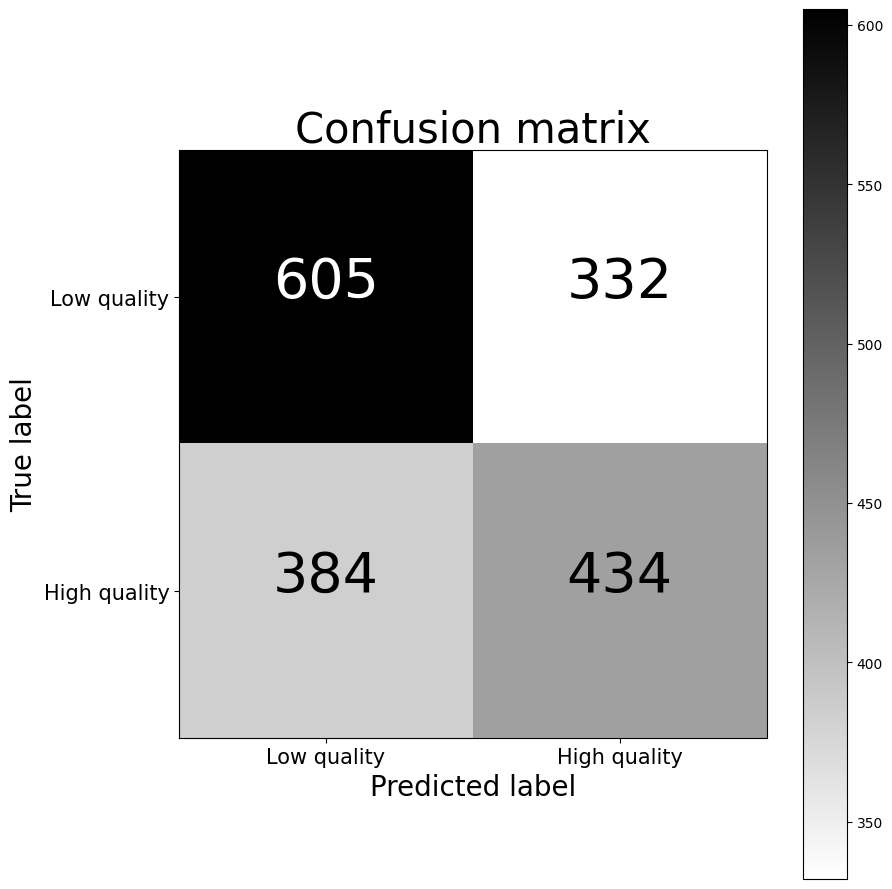

In [7]:
get_confusion_matrix_plot(y_predicted, y_test, figsize=(9,9))
plt.show()

## ROC Curve

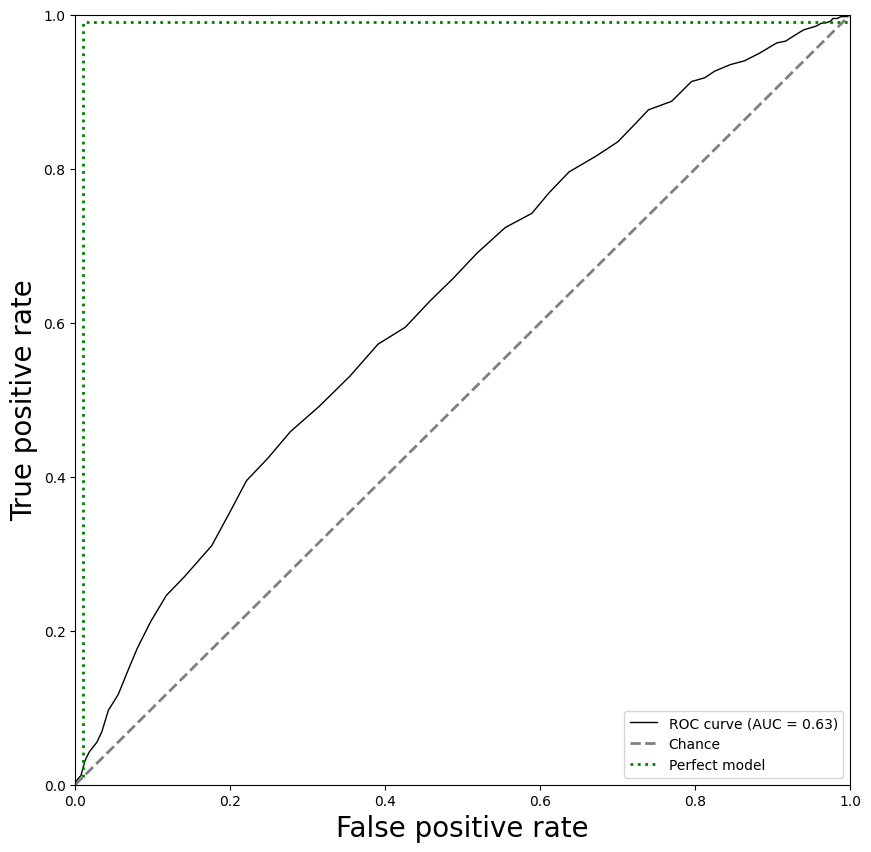

In [8]:
get_roc_plot(y_predicted_proba[:, 1], y_test, figsize=(10, 10))
plt.show()

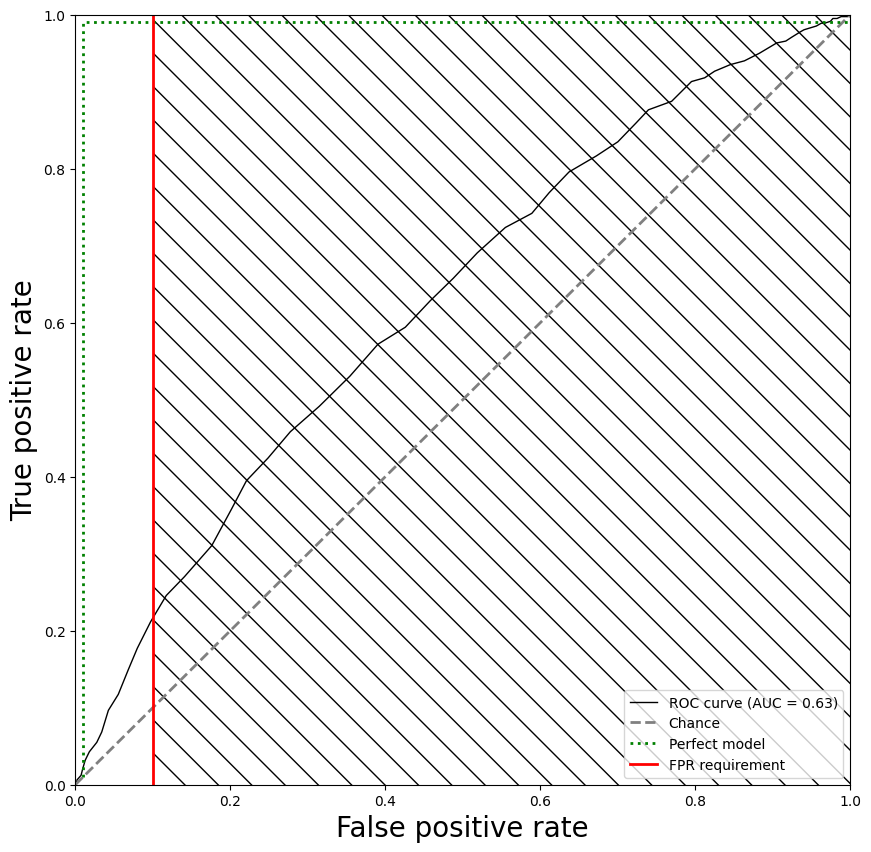

In [9]:
get_roc_plot(y_predicted_proba[:, 1], y_test, fpr_bar=.1, figsize=(10, 10))
plt.show()

## Calibration Curve

	Brier: 0.237


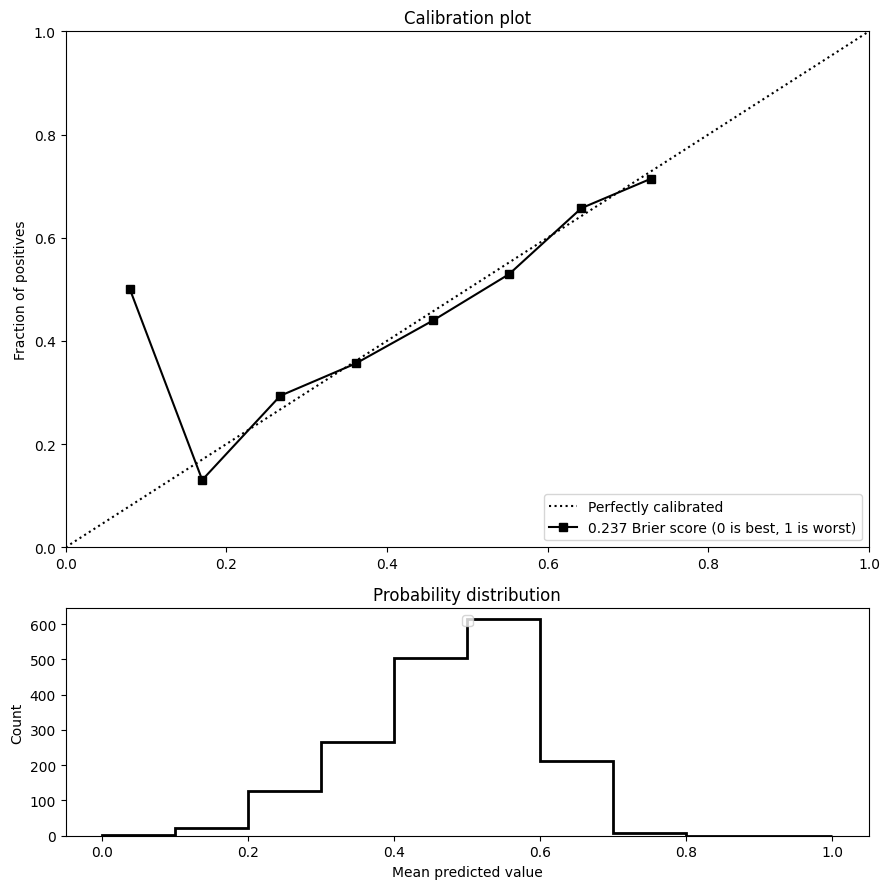

In [10]:
get_calibration_plot(y_predicted_proba[:, 1], y_test, figsize=(9,9))